In [8]:
%%html
<style>
    #notebook-container{
    width: 100%
    }
</style>

In [10]:
import numpy as np #importing required libraries
import matplotlib.pyplot as plt

# Problem 3

## Sub-task (b)

Solving system of leinar equations $Cv=b$ via matrix inverse using built-in method of numpy. So solution will be $v=C^{-1}b$ and should be in line with the one I found in companion PDF file manually. Vector of unknowns $v=\begin{pmatrix} c_0 & c_1 & c_2 & c_3 & c_4 & \lambda_1 & \lambda_2 & \lambda_3 & \lambda_4 \end{pmatrix}^T$

Manual solution: <br>
$c_0 = 0$, $c_1 = 0$, $c_2 = \frac{11}{6}$, $c_3 =  \frac{1}{3}$, $c_4 = -\frac{7}{6}$ <br>
$\lambda_1 = - \frac{29}{3}$, $\lambda_2 = 3$, $\lambda_3 = \frac{29}{3}$, $\lambda_4 = \frac{20}{3}$. <br>

In [2]:
C = np.array([ #defining matrix C
    [2, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 2, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 2, 0, 0, 1, 2, 0, 0],
    [0, 0, 0, 2, 0, 1, 3, 0, 0],
    [0, 0, 0, 0, 2, 1, 4, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 2, 3, 4, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0]
])

b = np.array([ #defining vector b
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [0],
    [0],
])

v = np.dot(np.linalg.inv(C),b) #solving system of linear equations
print("Solution is \n%s " %v.round(5))

Solution is 
[[ 0.     ]
 [ 0.     ]
 [ 1.83333]
 [ 0.33333]
 [-1.16667]
 [-9.66667]
 [ 3.     ]
 [ 9.66667]
 [ 6.66667]] 


As we could see, built-in function returns same results thus confirming my calclation in companion PDF file.

## Sub-task(c)

To solve system of linear equations $Cc=b$ with matrix $C$ we could do it using Moore-Penrose pseudo inverse $C^+$ and find solution as $c=C^+b$, where $C^+ = C^T (C C^T)^{-1}$

In [3]:
C = np.array([ #defining matrix C
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 2, 3, 4],
])

b = np.array([ #defining vector b
    [0],
    [0],
    [1],
    [0],
])

C_dag = np.dot(C.T, np.linalg.inv(np.dot(C, C.T))) #calculating Moore-Penrose pseudo inverse
v = np.dot(C_dag,b) #checking solution using manually calcualted Moore-Penrose pseudo inverse
print("Solution for system Cc=b using manually calculated pseudo inverse is c = \n %s " %v.round(5))

v = np.dot(np.linalg.pinv(C),b) #checking solution usuing built-in python function for finding 
#Moore-Penrose pseudo inverse
print("Solution for system Cc=b using built-in function to calculate pseudo inverse is c = \n %s " %v.round(5))



Solution for system Cc=b using manually calculated pseudo inverse is c = 
 [[ 0.     ]
 [ 0.     ]
 [ 1.83333]
 [ 0.33333]
 [-1.16667]] 
Solution for system Cc=b using built-in function to calculate pseudo inverse is c = 
 [[-0.     ]
 [-0.     ]
 [ 1.83333]
 [ 0.33333]
 [-1.16667]] 


As result, we could confirm solution found manually in sub-task (b) in companion PDF file. Also, I was able to confirm that manually calculated Moore-Penrose matrix is correct and matching with the one found by using built-in python function.

# Problem 5
## Sub-task(a)

### Steepest gradient descent method.

For steepest gradiaent descent we need to find gradient of function $f(x_1,x_2)$ which is a vector consisting of first partial derivatives of function $f(x_1, x_2)$ with respect to variables $x_1$ and $x_2$. Lets find first partial derivatives:

$\frac{\delta f(x_1,x_2)}{\delta x_1} = 20 x_1$

$\frac{\delta f(x_1,x_2)}{\delta x_2} = 2 x_2$

Then, gradient could be found as vector below:

$\nabla f(x_1,x_2) = (\frac{\delta f(x_1,x_2)}{\delta x_1}, \frac{\delta f(x_1,x_2)}{\delta x_2})^T = (20 x_1, 2 x_2)^T$

As next step, I am implementing function which allows to visualize gradient descent for given problem.

In [23]:
def plot_grad(xs, title): #function to visualize gradient descent base on list with values of x's
    xs_arr = np.array(xs) #transforming list to array

    plt.figure(figsize=(20,15)) #setting figure size
    x1 = np.linspace(-0.5, 0.5, 100) #creaating grid for countour plot
    x2 = np.linspace(-0.5, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2) #creating meshgrid of values for x1 and x2
    Y = 10*X1**2 + X2**2 #calculating values of y for given values of x1 and x2
    levels = [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0] #setting levels to be displayed on countour plot

    plt.contourf(X1, X2, Y, levels, alpha=0.7) #plotting countour plot
    plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1) #setting axis style
    plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
    for i in range(len(xs_arr) - 1): #plotting gradient step as red arrow
        plt.annotate('', xy=xs_arr[i + 1, :], xytext=xs_arr[i, :],
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                     va='center', ha='center')

    CS = plt.contour(X1, X2, Y, levels, linewidths=1,colors='black') #setting labels for countour lines
    plt.clabel(CS, inline=1, fontsize=8)
    plt.title(title)# 
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

Implementing various auxilary functions to sucesfully run gradient descent. Details of functions provided in comments.

In [19]:
def function_5(x): #defining given function
    return (10*x[0]**2 + x[1]**2).item()

def function_5_derivative(x): #defining function for gradient calculation
    return np.array([20*x[0], 2*x[1]])

def gradient_step(t, x_old): #execute single step of steepest gradient descent
    grad = function_5_derivative(x_old) #calculating gradient value
    x_new = x_old - t*grad #calculating x_new
    return x_new

def gradient_step_momentum(t, x_old, beta, z_old): #executing single step of steepest gradient descent with momentum
    grad = function_5_derivative(x_old) #calculating gradient value
    z = grad + beta*z_old #calculating gradient with momentum of previouse iteration
    x_new = x_old - t*z #calculating x_new
    return x_new, z

def calc_step(x_new, x_old): #function to calculate optimal step size
    return np.dot((x_new-x_old).T,(function_5_derivative(x_new) - function_5_derivative(x_old)))/np.linalg.norm(function_5_derivative(x_new) - function_5_derivative(x_old))**2
 

Implementing steepest gradient descent method with optimal step choice. 

In [73]:
def gradient_method(acc, x0, momentum_flag, step, beta=0.8): #method to execute gradient descent with optimal step size and with our without momentum
    z_old =  x_old = x0 #setting initial values
    t = step 
    iter_count = 0
    
    while True: #performing do-while loop
        iter_count+=1
        xs.append(x_old) #saving x_old into list for follow up gradient descent visualisation. 
        if (momentum_flag == False): #execute gradient with momentum or without
            x_new = gradient_step(t, x_old)
        else:
            x_new, z_old = gradient_step_momentum(t, x_old, beta, z_old) 
        t=calc_step(x_new, x_old) #calculating optimal step length
        if np.linalg.norm(x_new - x_old) <= acc: #check if exit condition is fullfilled
            xs.append(x_new)
            return x_new, iter_count
            break
        x_old = x_new #setting old parameters for next iteration
        
       

Calling steepest gradient descent method without momentum first to minimize given function. Once solution found - print it and plot results on countour plot.

Approximate solution is (0.00056, 0.00000). Found in 6 iterations.


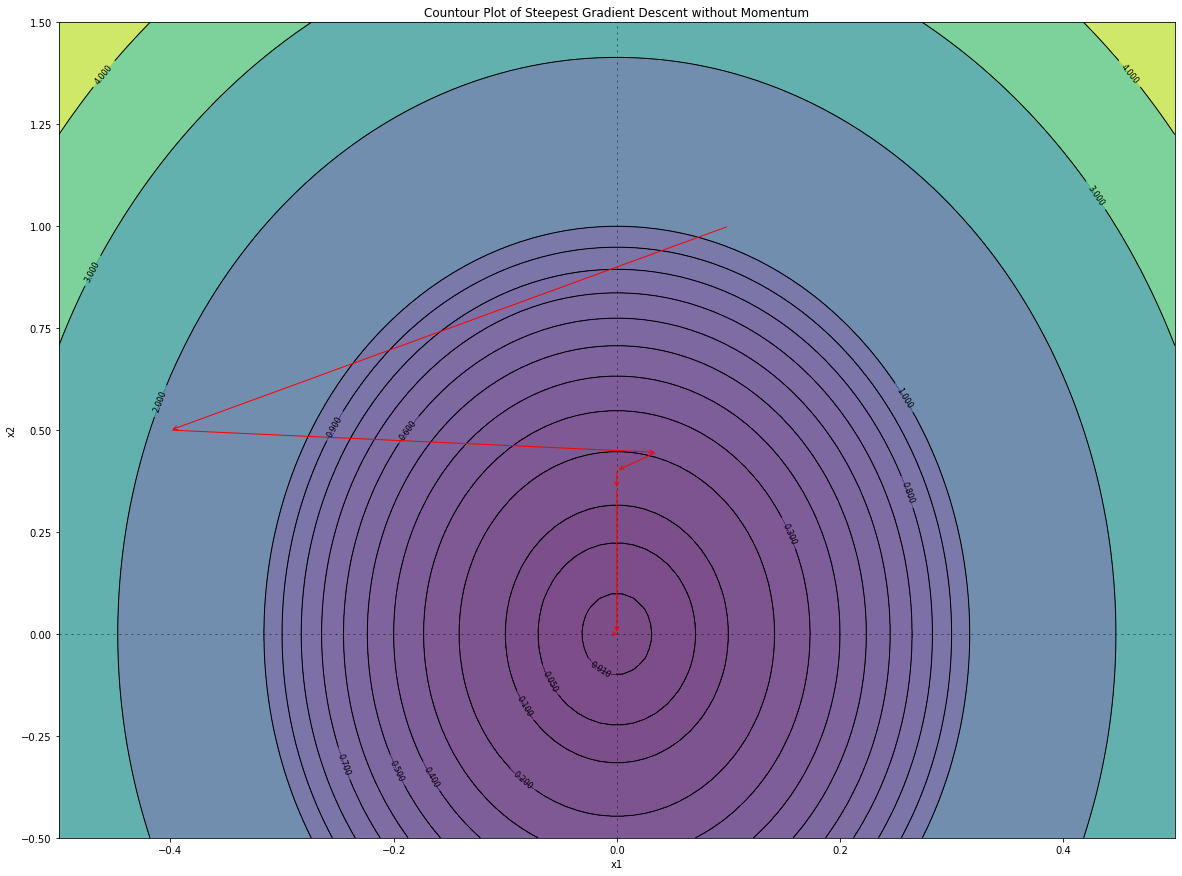

In [90]:
x0=np.array([[0.1], [1]]) #setting initial values and parameters
acc = 0.001
xs=[]
step = 0.25

solution, iter_count = gradient_method(acc, x0, False, step) #execute steepest gradient descent without momentum
print("Approximate solution is (%.5f," %solution[0], "%.5f)." %solution[1], "Found in %s iterations." %iter_count)

plot_grad(xs, "Countour Plot of Steepest Gradient Descent without Momentum") #plotting results on countour plot

Executing steepest gradient descent with momentum to minimize given function. After results found - print it and visualize results using countour plot.

Approximate solution is (0.00082, -0.00352). Found in 18 iterations.


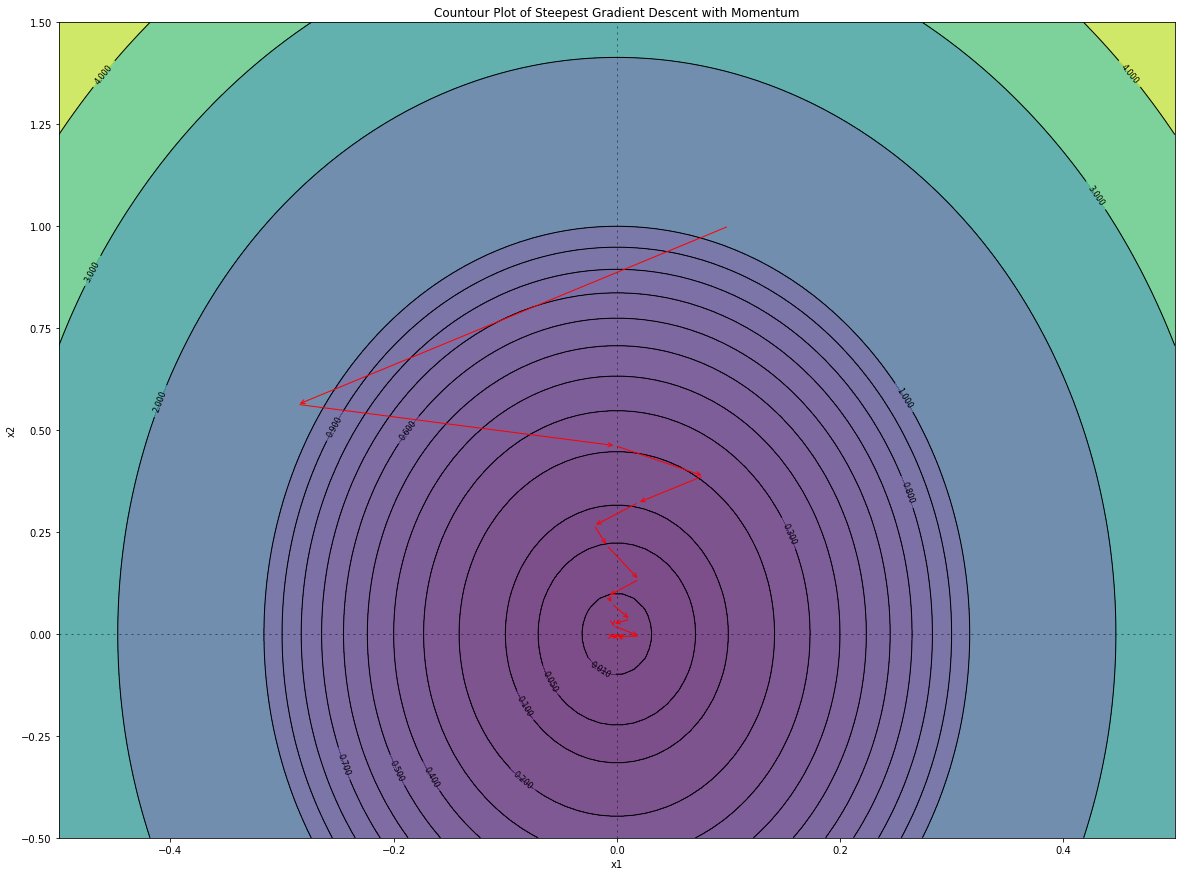

In [85]:
x0=np.array([[0.1], [1]]) #setting initial values and parameters
acc = 0.001
xs=[]
step = 0.19

solution, iter_count = gradient_method(acc, x0, True, step, 0.3) #execute steepest gradient descent with momentum
print("Approximate solution is (%.5f," %solution[0], "%.5f)." %solution[1], "Found in %s iterations." %iter_count)

plot_grad(xs, "Countour Plot of Steepest Gradient Descent with Momentum") #plotting results on countour plot

Looks like combination of momentum with calculated optimal step size increase amount of iterations required for gradient descent to find suitable solution, considering given accuracy.

## Task (b)

### Classical Newton method

For classical Newton method we could use Hessian matrix of given fucntion (matrix of second order partial derivatives) to find critical points. Hence, we need to find Hessian matrix for given fucntion f(x_1,x_2): <br>
$H(x)=\begin{pmatrix}\frac{\delta^2 f(x_1,x_2)}{\delta x_1^2} & \frac{\delta^2 f(x_1,x_2)}{\delta x_2 x_1} \\ \frac{\delta^2 f(x_1,x_2)}{\delta x_1 x_2} & \frac{\delta^2 f(x_1,x_2)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 20 & 0 \\ 0 & 2 \end{pmatrix}$ <br>
After Hessian matrix were found, I could implement Newton method to minimize given function and plot it results.

Approximate solution is (0.00000, 0.00000). Found in 1 iteration(s).


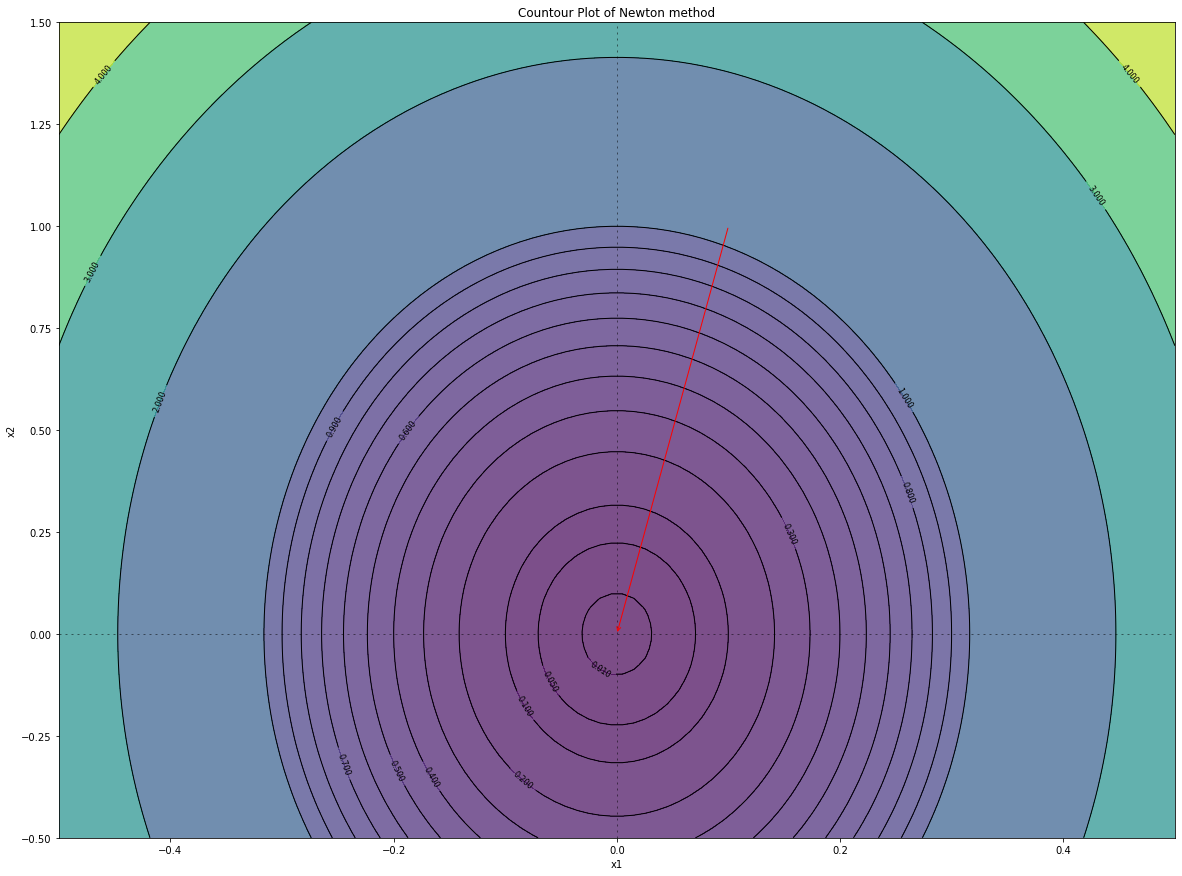

In [94]:
def newtown_step(x_old, H): #method to execute single step of Newton method
    grad = function_5_derivative(x_old) #calculating function gradient
    x_new = x_old - np.dot(np.linalg.inv(H), grad) #calculating new value of x using inverse of Hessian matrix and gradient
    return x_new
    
def newton_method(acc, x0): #implementing Newton method 
    H=np.array([[20, 0], [0, 2]]) #seting initial values and Hessian
    x_old=x0
    iter_count = 0
    
    while True: #implementing do-while loop
        iter_count+=1
        xs.append(x_old) #record x's for visualization later on
        x_new = newtown_step(x_old, H) #calculate new value of x using Newton single step method
        if np.linalg.norm(x_new - x_old) <= acc: #checking loop exit condition
            xs.append(x_new) 
            return x_new, iter_count
            break
        x_old = x_new #setting old values for next iteration
        
        
xs=[] #setting initial values
acc=0.001
x0=np.array([[0.1], [1]])      

solution, iter_count = newton_method(acc, x0) #minimizing given function usign Newton method
print("Approximate solution is (%.5f," %solution[0], "%.5f)." %solution[1], "Found in %s iteration(s)." %(iter_count-1))

plot_grad(xs, "Countour Plot of Newton method") #ploting results using countour plot

## Task (c)
### Conjugate Gradient method

For Conjugate Gradient method (CGM) we need to know matrix $A$ and vector $b$ of respective linear system $Ax=b$, however in case of functions we could use gradient and avoid necessity to know vector $b$ for residuals calculation, but matrix $A$ is still required. To find matrix $A$ for given function $f(x_1,x_2)$ we need to find second order partial derivatives, so that matrix $A=\begin{pmatrix} 20 & 0 \\ 0 & 2 \end{pmatrix}$.

In [102]:
def CGM(A, x0, acc): #iteratin algorithm for CGM
    
    x_old=x0#setting initial value for x0
    r0 = -function_5_derivative(x_old) #setting value for residual r0 usign gradient function defined
    r_old=r0 #set initial residual and conjugate gradient values
    p_old=r0
    iter=0
    
    while True: #execute method until accuracy achieved
        xs.append(x_old)
        print("\nIteration number %s" %(iter+1))
        alpha_k=(np.dot(np.transpose(r_old), r_old)).item()/(np.dot(np.transpose(p_old),np.dot(A, p_old))).item() #calculating new alpha_k for current step as per CGM formula
        x_new = x_old + alpha_k*p_old #calculating new value for x based on value of alpha_k calcualted above
        print("Conjugate gradient is p=%s" %p_old.round(5)) #printing out conjugate gradient of current iteration
        r_new = -function_5_derivative(x_new) #calculating new residual
        if (np.linalg.norm(r_new) < acc): #check if norm of new residual is less than accuracy
            xs.append(x_new)
            print("\nSolution is %s" %x_new.round(5), "found in %s" %(iter+1), "iterations")
            break
        beta = (np.dot(np.transpose(r_new), r_new)).item()/(np.dot(np.transpose(r_old), r_old)).item() #calculating value for beta
        p_new = r_new + beta * p_old #calculating new conjugate gradient to be used on next step
        iter+=1 
        x_old=x_new #updating old values for next iteration
        r_old=r_new
        p_old=p_new

Solving system Ax=b from Problem 1 using conjugate gradient method executed untill accuracy 0.001 achieved:

Iteration number 1
Conjugate gradient is p=[[-2.]
 [-2.]]

Iteration number 2
Conjugate gradient is p=[[ 0.29752]
 [-2.97521]]

Solution is [[0.]
 [0.]] found in 2 iterations


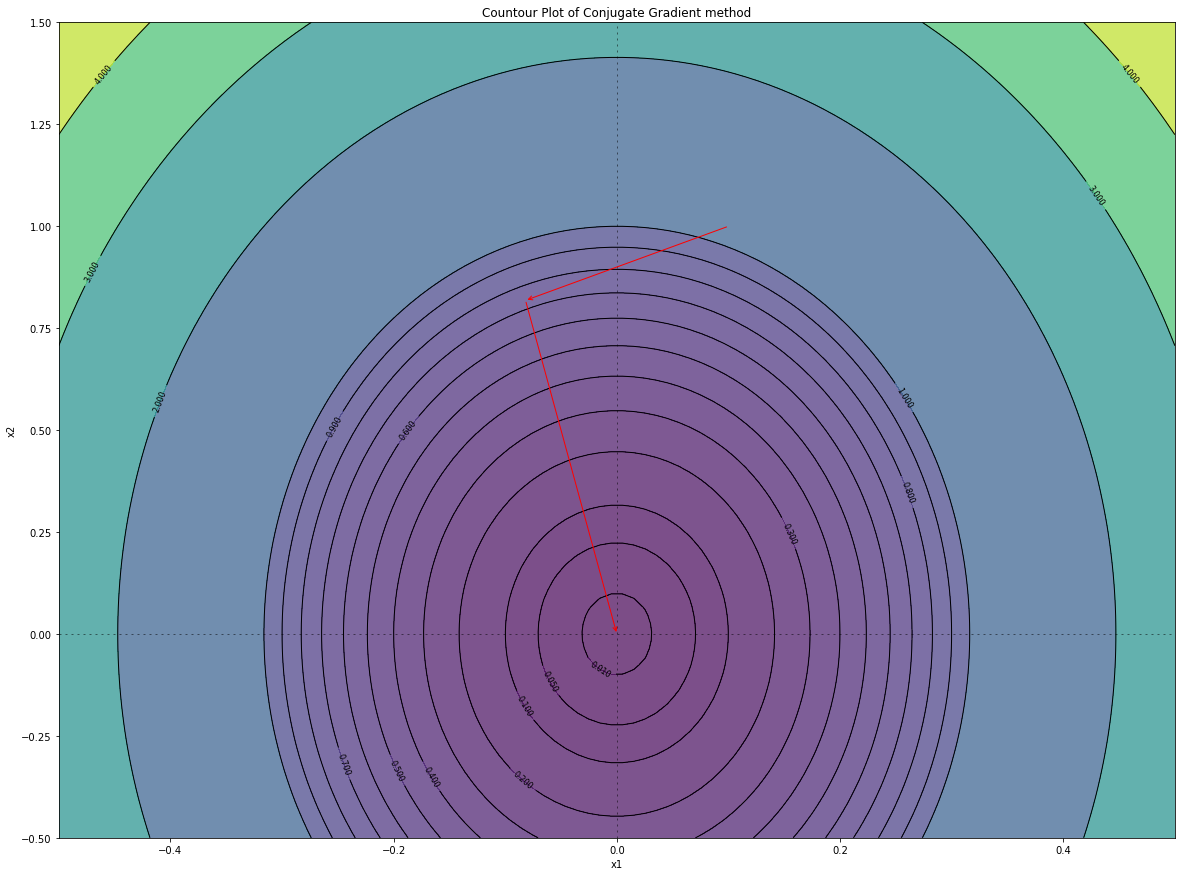

In [103]:
A = np.array([[20, 0], [0, 2]]) #setting matrix A
x0=np.array([[0.1], [1]])  #setting initial value for x0
acc = 0.001 #setting accuracy.
xs=[]

print("Solving system Ax=b from Problem 1 using conjugate gradient method executed untill accuracy %.3f achieved:" %acc)
CGM(A, x0, acc) #executing CGM 

plot_grad(xs, "Countour Plot of Conjugate Gradient method")